In [191]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objs as go

import plotly.express as px

from plotly.subplots import make_subplots

In [192]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
    

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)

CustomerId — идентификатор клиента

Surname — фамилия клиента

CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)

Geography — страна клиента (банк международный)

Gender — пол клиента

Age — возраст клиента

Tenure — сколько лет клиент пользуется услугами банка

Balance — баланс на счетах клиента в банке

NumOfProducts — количество услуг банка, которые приобрёл клиент

HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)

IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)

EstimatedSalary — предполагаемая заработная плата клиента

Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

In [193]:
churn_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [194]:
churn_data = churn_data.drop('RowNumber', axis = 1, )


In [195]:
churn_data.duplicated().any()


np.False_

In [196]:
churn_data.describe()


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

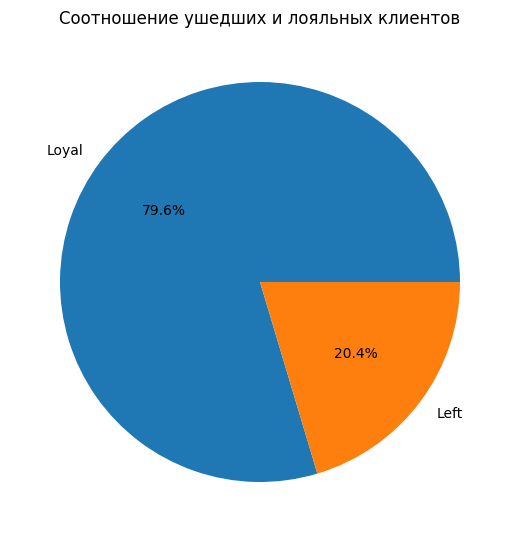

In [197]:
proportion_of_exited = churn_data['Exited'].value_counts() # с помощью метода value_counts посмотрим соотношение  ушедших

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    proportion_of_exited,
    labels= ['Loyal',  'Left'] ,
    autopct= '%.1f%%')
plt.title("Соотношение ушедших и лояльных клиентов")

1. Доля ушедших клиентов банка в 20.4% может быть поводом для беспокойства. Высокий уровень оттока клиентов может указывать на проблемы с качеством обслуживания, недостаточную удовлетворенность клиентов или наличие более привлекательных предложений у других банков.

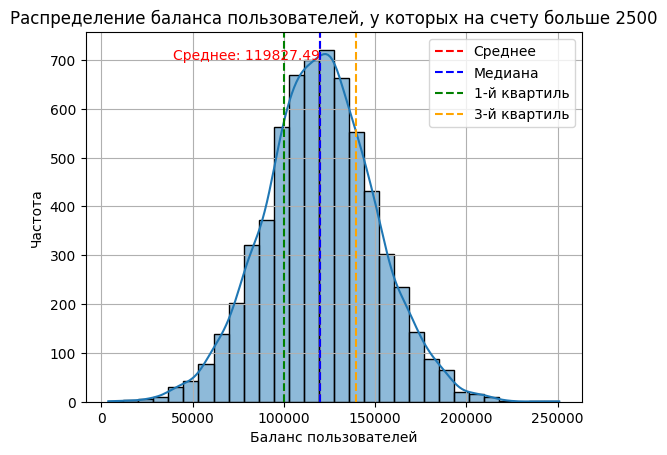

In [198]:
filtered_churn_data = churn_data[churn_data['Balance'] > 2500]

mean_balance = filtered_churn_data['Balance'].mean()
median_balance = filtered_churn_data['Balance'].median()
q1_balance = filtered_churn_data['Balance'].quantile(0.25)
q3_balance = filtered_churn_data['Balance'].quantile(0.75)

sns.histplot(data=filtered_churn_data, x="Balance", bins=30, kde=True)
plt.axvline(mean_balance, color='red', linestyle='--', label='Среднее')
plt.axvline(median_balance, color='blue', linestyle='--', label='Медиана')
plt.axvline(q1_balance, color='green', linestyle='--', label='1-й квартиль')
plt.axvline(q3_balance, color='orange', linestyle='--', label='3-й квартиль')
plt.grid()
plt.legend()
plt.text(mean_balance, 700, f'Среднее: {mean_balance:.2f}', color='red', ha='right')

plt.title("Распределение баланса пользователей, у которых на счету больше 2500")
plt.xlabel("Баланс пользователей")
plt.ylabel("Частота")

plt.show()


Как мы видим на графике распределение баланса логнормальное. Большинство клиентов имеют относительно низкие балансы, и лишь небольшая часть обладает  высоким. Можно предположить, что стоит обратить внимание на качество услуг и продумать выгодные условия для более состоятельных клиентов.

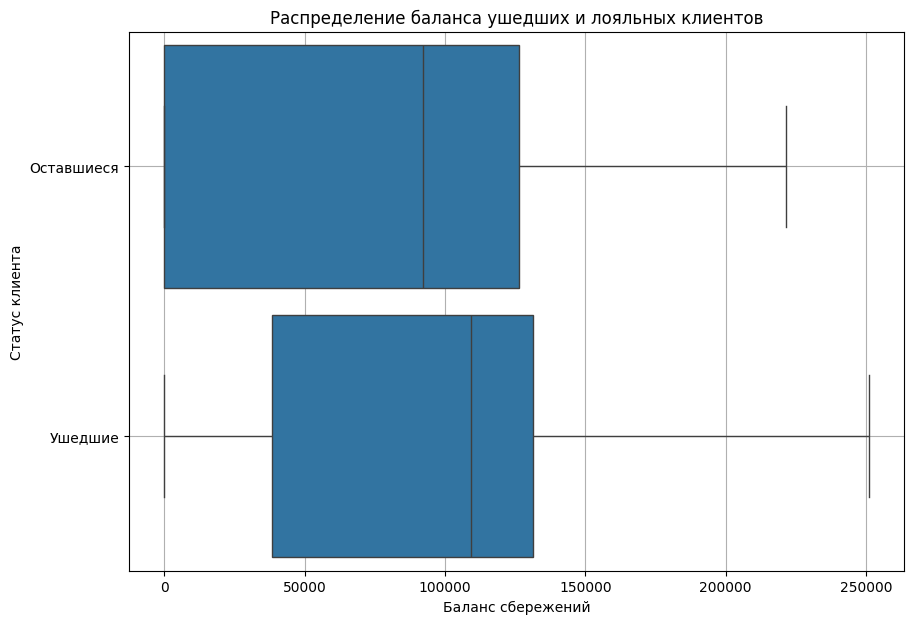

In [199]:
fig = plt.figure(figsize=(10,7))
loyal_exited_balance = sns.boxplot( data = churn_data,
                                   y= 'Exited', 
                                   x= 'Balance',
                                   orient= 'h',
                                   width = 0.9)
loyal_exited_balance.set_title('Распределение баланса ушедших и лояльных клиентов')
loyal_exited_balance.set_xlabel('Баланс сбережений')
loyal_exited_balance.set_ylabel('Статус клиента')
loyal_exited_balance.set_yticks([0, 1])  # Устанавливаем позиции меток
loyal_exited_balance.set_yticklabels(['Оставшиеся', 'Ушедшие'])  # Устанавливаем текст меток


loyal_exited_balance.grid()

На графике обращает внимание, что баланс ушедших клиентов выше, чем у оставшихся. Это может указывать на то, что более состоятельные клиенты, возможно, не были удовлетворены качеством обслуживания или предложениями банка, что и стало причиной их ухода. 

C:\Users\Kaiya07\AppData\Local\Temp\ipykernel_16752\3666956517.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




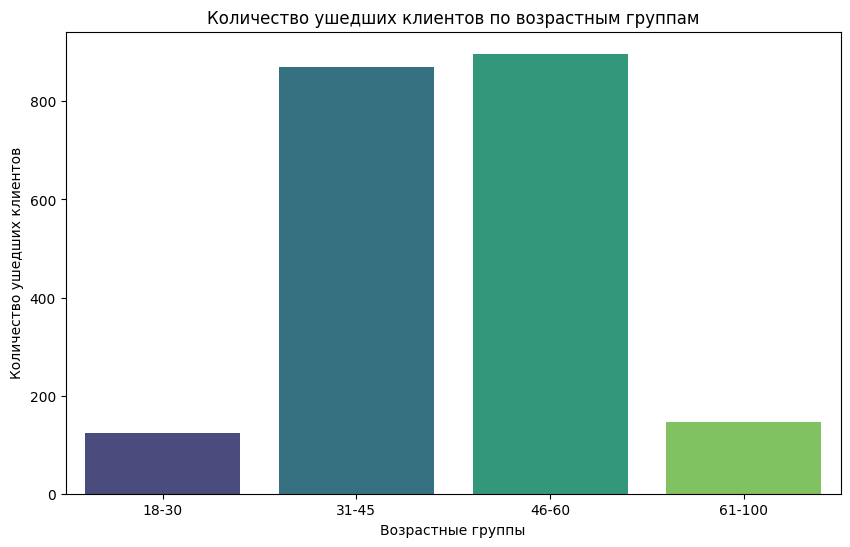

In [ ]:
bins = [18, 30, 45, 60, 100] #для возраста создадим отдельные группы
labels = ['18-30', '31-45', '46-60', '61-100'] 
churn_data['age_group'] = pd.cut(churn_data['Age'], bins=bins, labels=labels, right= False )
exited_clients= churn_data[churn_data['Exited'] == 1]

plt.figure(figsize=(10, 6))
age_group_plot = sns.countplot(
    data=exited_clients,
    x='age_group',
    order=labels,  
    palette='viridis'
)


age_group_plot.set_title('Количество ушедших клиентов по возрастным группам')
age_group_plot.set_xlabel('Возрастные группы')
age_group_plot.set_ylabel('Количество ушедших клиентов')


plt.show()

Наибольшее количество ушедших находится в диапозоне от 31 до 60 лет. Это несколько тревожит, т.к. данная категория возраста является трудоспособной. Возможно стоит подумать над выгодными условиями для зарплатных клиентов.

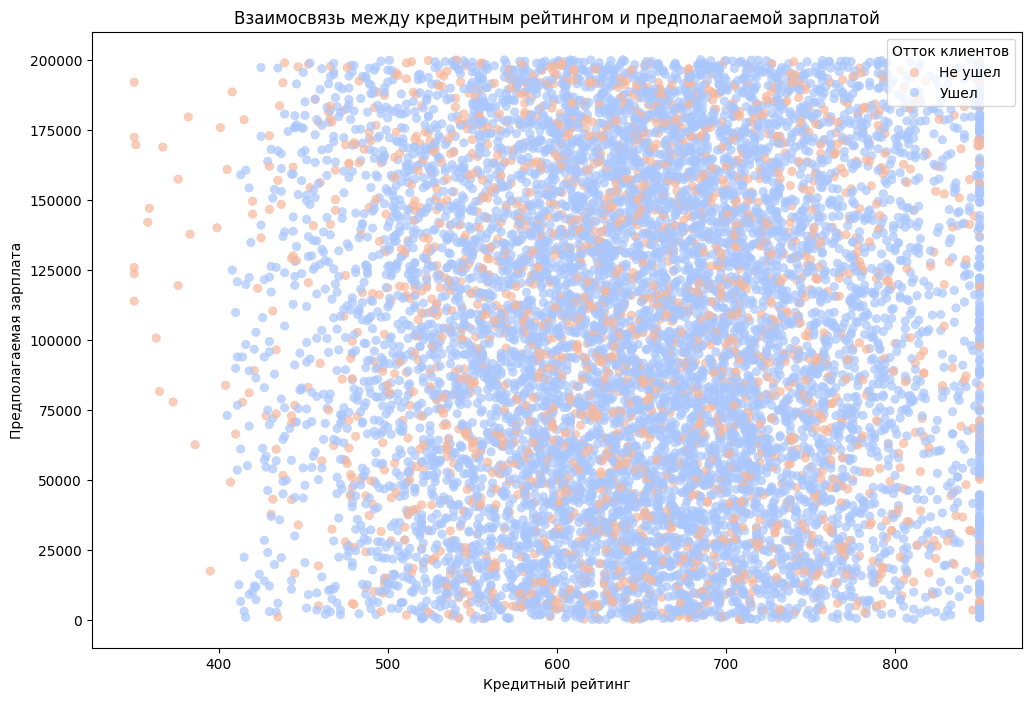

In [201]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',  # Цветовая кодировка по признаку оттока
    palette='coolwarm',  # Цветовая палитра
    alpha=0.7,  # Прозрачность точек
    edgecolor=None  # Убираем обводку точек
)

# Устанавливаем заголовок и метки осей
scatter_plot.set_title('Взаимосвязь между кредитным рейтингом и предполагаемой зарплатой')
scatter_plot.set_xlabel('Кредитный рейтинг')
scatter_plot.set_ylabel('Предполагаемая зарплата')

# Показываем график
plt.legend(title='Отток клиентов', loc='upper right', labels=['Не ушел', 'Ушел'])
plt.show()

При построении графика распределения видно, что прямой взаимосвязи нет.

In [202]:
pivot_table_gender

,Exited
Gender,
Female,0.250715
Male,0.164559


Text(0.5, 1.0, 'Соотношение ушедших мужчин и женщин')

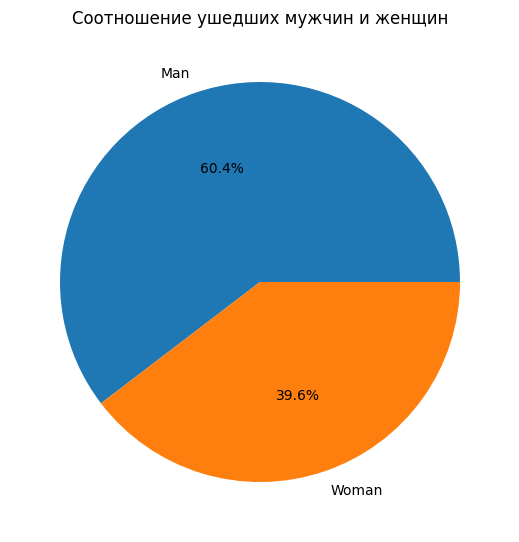

In [203]:
pivot_table_gender= churn_data.pivot_table( values= 'Exited', index='Gender', aggfunc= 'mean')
pivot_table_gender
fig = plt.figure(figsize=(5, 5))
gender_share = fig.add_axes([0, 0, 1, 1])
gender_share.pie(
    pivot_table_gender.values.flatten(),
    labels= ['Man',  'Woman'] ,
    autopct= '%.1f%%')
plt.title("Соотношение ушедших мужчин и женщин")

Так же тревожно, что мужчины уходят чаще, чем женщины.

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

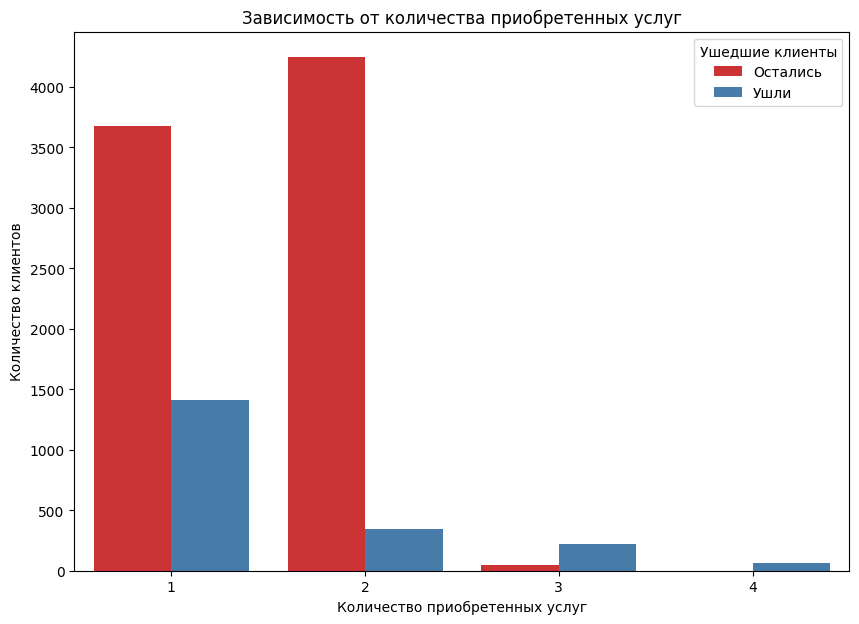

In [204]:

fig = plt.figure(figsize=(10, 7))
barplot = sns.countplot(
    data=churn_data,
    x='NumOfProducts',
    hue='Exited',
    palette='Set1'
)

# Настраиваем подписи и заголовок
barplot.set_xlabel('Количество приобретенных услуг')
barplot.set_ylabel('Количество клиентов')
barplot.set_title('Зависимость от количества приобретенных услуг')

# Отображаем легенду
plt.legend(title='Ушедшие клиенты', labels=['Остались', 'Ушли'])

# Показываем график
plt.show()

Как мы видим количество оставшихся клиентов которые приобрели 3 и более услуг невелико, т.о стоит обратить внимание на качество обслуживания.

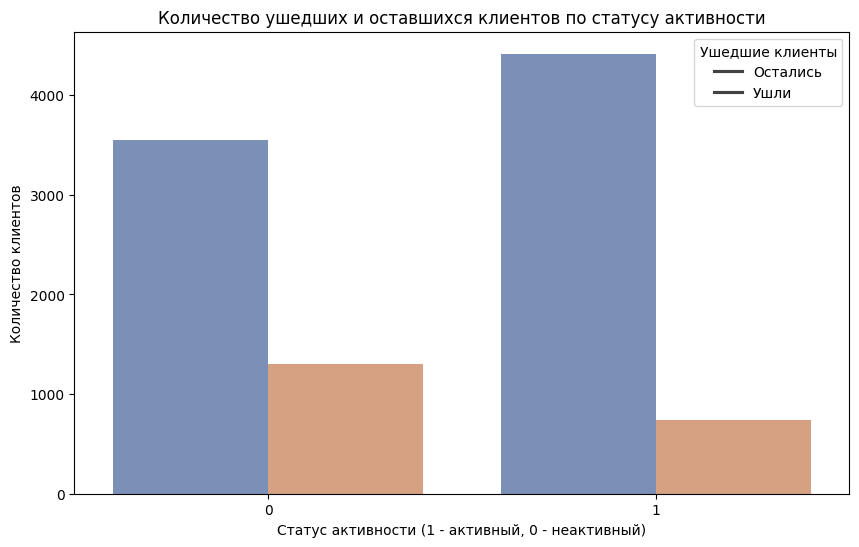

In [255]:
active_member_count  = churn_data.groupby('IsActiveMember')['Exited'].value_counts().unstack(fill_value=0)
active_member_count = active_member_count.reset_index()
active_member_count = active_member_count.melt(id_vars='IsActiveMember', value_vars=[0, 1],
                                               var_name='Exited', value_name='Count')

plt.figure(figsize=(10, 6))  # Увеличение размера графика
bar_plot = sns.barplot(data=active_member_count, x='IsActiveMember', y='Count', hue='Exited',
                       palette='deep', alpha=0.8)

plt.title('Количество ушедших и оставшихся клиентов по статусу активности')
plt.xlabel('Статус активности (1 - активный, 0 - неактивный)')
plt.ylabel('Количество клиентов')

plt.legend(title='Ушедшие клиенты', labels=['Остались', 'Ушли'])

plt.show()

Мы видим, что ушедших клиентов без статуса активного клиента больше. Возможно стоит обратить внимание на условия предоставления данного статуса и сделать их более выгодными.

In [260]:
country_data = churn_data.groupby('Geography').agg(
    total_clients=('Exited', 'count'),
    exited_clients=('Exited', 'sum')
).reset_index()

# Шаг 2: Расчет доли ушедших клиентов
country_data['exit_rate'] = country_data['exited_clients'] / country_data['total_clients'] * 100

# Шаг 3: Построение тепловой карты
fig = px.choropleth(
    data_frame=country_data,
    locations='Geography',
    locationmode='country names',
    color='exit_rate',
    range_color=[0, 100],  # Доля в процентах
    title='Доля ушедших клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)

# Отображение графика
fig.show()

Наибольшая доля ушедших наблюдается в Германии. В Германии существует высокая конкуренция среди банков и финансовых учреждений. Клиенты могут легко переключаться на более привлекательные предложения, что увеличивает уровень оттока.

In [264]:
def get_credit_score_cat(credit_score):
        if credit_score >= 300 and credit_score < 500:
            return "Very_Poor"
        elif credit_score >= 500 and credit_score < 601:
            return "Poor"
        elif credit_score >= 601 and credit_score < 661:
            return "Fair"
        elif credit_score >= 661 and credit_score < 781:
            return "Good"
        elif credit_score >= 781 and credit_score < 851:
            return "Excellent"
        elif credit_score >= 851:
            return "Top"
        elif credit_score < 300:
            return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

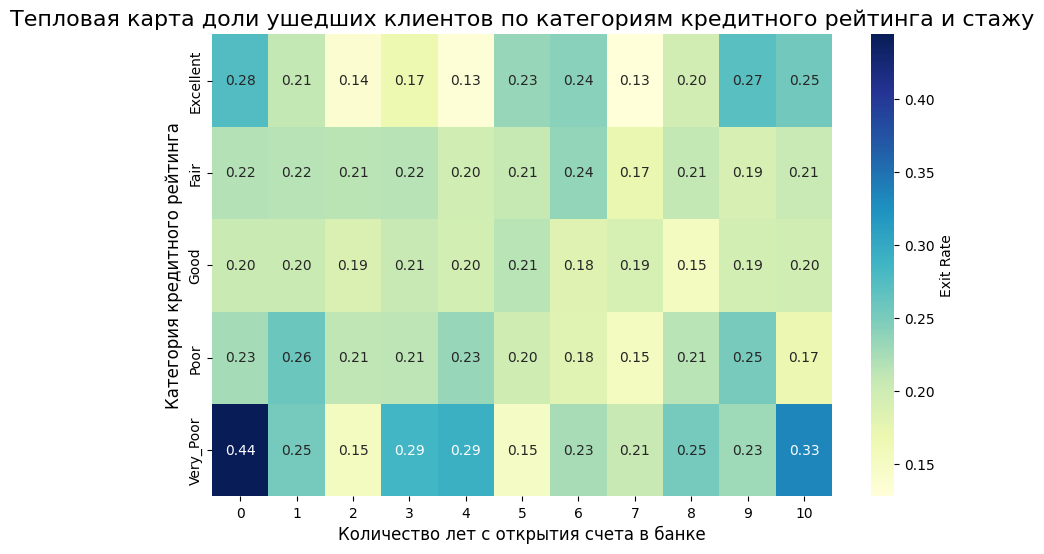

In [270]:
ten = churn_data.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')
plt.figure(figsize=(10, 6))  # Установите размер графика
heatmap = sns.heatmap(data=ten, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Exit Rate'})
heatmap.set_title('Тепловая карта доли ушедших клиентов по категориям кредитного рейтинга и стажу', size=16)
heatmap.set_xlabel('Количество лет с открытия счета в банке', size=12)
heatmap.set_ylabel('Категория кредитного рейтинга', size=12)
plt.show()

Из тепловой карты мы видим, что наибольшей коэфициент ухода среди малосостоятельных граждан, которые открыли счет в банке менее года спустя. Но и среди состоятельных клиентов тоже наблюдается отток, как среди новых, так и старых клиентов. Из чего можно сделать вывод, что банку стоит обратить внимание на качество услуг и условия обслуживания в банке.